<a href="https://colab.research.google.com/github/bhavinithak/DeepLearning_Pytorch/blob/main/is_it_a_bird%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai

In [2]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [3]:
from fastbook import *

In [4]:
urls=search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'https://wallup.net/wp-content/uploads/2018/10/07/766928-warbler-bird-birds-nature-wildlife.jpg')

In [5]:
dest=Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

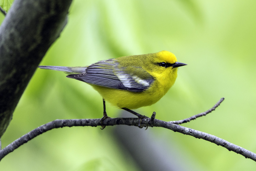

In [6]:
im =Image.open(dest)
im.to_thumb(256, 256)

#**Download Images**

In [7]:
searches ='forest','bird'
path =Path('bird_or_not')

if not path.exists():
  for o in searches:
    dest=(path/o)
    dest.mkdir(exist_ok=True, parents=True)
    results = search_images_ddg(f'{o} photo')
    print(results)
    download_images(dest,urls=results[:200])
    resize_images(dest,max_size=400, dest=dest)

['https://wallpapercave.com/wp/wp3123505.jpg', 'https://www.viewbug.com/media/mediafiles/2015/02/17/46545341_large.jpg', 'https://i.redd.it/dqxwmx1wdea41.jpg', 'https://img.theculturetrip.com/1440x807/smart/wp-content/uploads/2020/05/getty-redwoods-scottmcgee-eyeem2.jpg', 'https://images3.alphacoders.com/600/thumb-1920-600155.jpg', 'https://wallpapercave.com/wp/2M8ul7E.jpg', 'https://wallup.net/wp-content/uploads/2019/09/652109-landscape-nature-tree-forest-woods-path.jpg', 'https://www.publicdomainpictures.net/pictures/300000/velka/forest-landscape-1555504676vbL.jpg', 'https://computerbackgroundimages.com/wp-content/uploads/2020/08/Scenic-View-of-Lake-in-Forest-Photo-by-Pixabay-from-Pexels-scaled.jpg', 'https://cdn2.wanderlust.co.uk/media/1037/forest-web.jpg?anchor=center&mode=crop&width=1200&height=0&rnd=132605629110000000', 'https://www.treehugger.com/thmb/qreJYKRzZlP8m1YZvtOw5D2crh8=/3995x2663/filters:no_upscale():max_bytes(150000):strip_icc()/forestswithlittlefootpath-18e20b6595154

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);
len(failed)

8

#**Training**

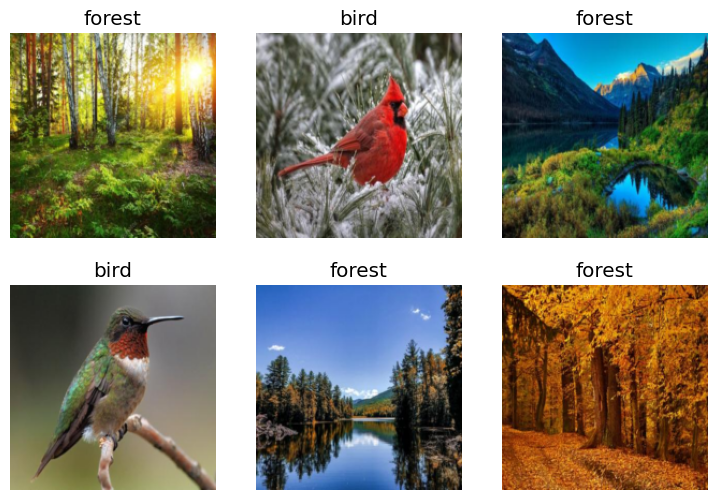

In [9]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter =RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
    ).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.524765,0.035469,0.000000,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.011495,0.000048,0.000000,01:01
1,0.013925,0.001851,0.000000,01:00
2,0.010507,0.000320,0.000000,01:00


#**Prediction**

In [11]:
is_bird,_,probs=learn.predict(PILImage.create('bird.jpg'))
print(f'This is a: {is_bird}')
print(f'Probability its a bird:{probs[0]:.4f}')

This is a: bird
Probability its a bird:1.0000
